In [1]:
#imports
import pandas as pd
from pandas import set_option
import numpy as np
import math as math
import seaborn as sns

import matplotlib
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import plot_confusion_matrix
from sklearn.calibration import calibration_curve
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

set_option('display.width', 100)
set_option('precision', 2)

pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)
%matplotlib inline

# Cargando y explorando los datos

In [2]:
dataFrame = pd.read_csv('customerTargeting.csv', header =0)

***
> Mostramos las columnas que tiene el data frame
> Mostramos información del tipo de dato que tenemos en cada variable
***

In [3]:
dataFrame.columns

Index(['g1_1', 'g1_2', 'g1_3', 'g1_4', 'g1_5', 'g1_6', 'g1_7', 'g1_8', 'g1_9', 'g1_10', 'g1_11',
       'g1_12', 'g1_13', 'g1_14', 'g1_15', 'g1_16', 'g1_17', 'g1_18', 'g1_19', 'g1_20', 'g1_21',
       'g2_1', 'g2_2', 'g2_3', 'g2_4', 'g2_5', 'g2_6', 'g2_7', 'g2_8', 'g2_9', 'g2_10', 'g2_11',
       'g2_12', 'g2_13', 'g2_14', 'g2_15', 'g2_16', 'g2_17', 'g2_18', 'g2_19', 'g2_20', 'g2_21',
       'c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6', 'c_7', 'c_8', 'c_9', 'c_10', 'c_11', 'c_12',
       'c_13', 'c_14', 'c_15', 'c_16', 'c_17', 'c_18', 'c_19', 'c_20', 'c_21', 'c_22', 'c_23',
       'c_24', 'c_25', 'c_26', 'c_27', 'c_28', 'target'],
      dtype='object')

In [4]:
print(dataFrame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6620 entries, 0 to 6619
Data columns (total 71 columns):
g1_1      6620 non-null float64
g1_2      6620 non-null int64
g1_3      6620 non-null int64
g1_4      6620 non-null int64
g1_5      6620 non-null int64
g1_6      6620 non-null int64
g1_7      6620 non-null int64
g1_8      6620 non-null int64
g1_9      6620 non-null int64
g1_10     6620 non-null int64
g1_11     6620 non-null int64
g1_12     6620 non-null int64
g1_13     6620 non-null float64
g1_14     6620 non-null float64
g1_15     6620 non-null float64
g1_16     6620 non-null float64
g1_17     6620 non-null float64
g1_18     6620 non-null float64
g1_19     6620 non-null float64
g1_20     6620 non-null float64
g1_21     6620 non-null float64
g2_1      6620 non-null float64
g2_2      6620 non-null int64
g2_3      6620 non-null int64
g2_4      6620 non-null int64
g2_5      6620 non-null int64
g2_6      6620 non-null int64
g2_7      6620 non-null int64
g2_8      6620 non-null int64
g

***
> Buscando datos invalidos o nulos
> [ Vemos que no hay datos invalidos ]
***

In [5]:
print("Total de datos nulos o invalidos: " , dataFrame.isnull().sum().sum(), sep='\n')

Total de datos nulos o invalidos: 
0


In [6]:
dataFrame.describe()

,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,g1_11,g1_12,g1_13,g1_14,g1_15,g1_16,g1_17,g1_18,g1_19,g1_20,g1_21,g2_1,g2_2,g2_3,g2_4,g2_5,g2_6,g2_7,g2_8,g2_9,g2_10,g2_11,g2_12,g2_13,g2_14,g2_15,g2_16,g2_17,g2_18,g2_19,g2_20,g2_21,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,c_12,c_13,c_14,c_15,c_16,c_17,c_18,c_19,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
count,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6.62e+03,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6.62e+03,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.0,6620.00,6620.0,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6620.00,6.62e+03,6.62e+03,6.62e+03,6620.00,6620.00,6620.00,6.62e+03,6620.00,6620.00
mean,2.71,14.42,10.49,24.91,10.99,13.41,10.16,10.75,14.17,3.25,-3.42,-0.17,3.15,3.04,10.27,4.74,1.12,1.16,0.21,5.89e-02,0.45,4.81,15.11,10.02,25.13,11.03,14.04,10.63,10.25,13.50,3.41,-3.25,0.16,3.18,3.05,4.84,1.15,1.13,0.21,5.82e-02,0.45,3.90,1.89,1.56,1.56,3.12,0.18,0.2,0.18,0.2,1.95,4.41,-4.63,-0.22,-0.09,-0.09,0.11,0.13,6.50,-6.83,-0.33,-0.03,-6.72e-03,-4.15e-03,8.83e-03,0.00,-0.23,-0.10,4.08e-04,1.92,1.03
std,1.86,10.70,8.38,18.17,5.64,10.09,7.50,7.96,9.87,8.48,8.58,15.04,0.93,0.83,3.76,2.13,0.58,0.57,0.27,1.52e-01,0.14,3.94,10.84,8.25,18.19,5.67,10.21,7.56,7.83,9.72,8.75,8.31,15.03,0.93,0.82,2.15,0.59,0.55,0.27,1.51e-01,0.14,1.09,0.23,4.06,4.06,3.94,0.39,0.4,0.39,0.4,1.22,8.50,9.09,14.47,7.47,6.38,6.34,7.42,12.18,12.97,21.50,1.22,1.07e+00,6.63e-01,6.83e-01,0.32,3.39,1.94,9.28e-02,0.30,0.73
min,1.05,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,-27.00,-38.00,-65.00,0.00,0.17,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.95,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,-27.00,-36.00,-63.00,0.00,0.22,0.00,0.00,0.00,0.00,0.00e+00,0.00,2.50,0.00,-10.00,-10.00,-6.00,0.00,0.0,0.00,0.0,0.00,-28.00,-47.00,-63.00,-33.00,-29.00,-28.00,-40.00,-39.00,-74.00,-101.00,-4.68,-4.32e+00,-2.51e+00,-3.12e+00,-2.00,-15.20,-9.18,-7.50e-01,0.00,0.00
25%,1.67,6.00,4.00,10.00,6.00,5.00,4.00,4.00,6.00,-2.00,-8.00,-8.25,2.50,2.49,8.51,3.39,0.74,0.78,0.01,1.83e-03,0.35,2.50,6.00,3.00,11.00,6.00,6.00,4.00,4.00,5.00,-2.00,-8.00,-8.00,2.50,2.50,3.47,0.76,0.76,0.01,1.83e-03,0.35,3.25,1.74,-1.00,-1.00,0.00,0.00,0.0,0.00,0.0,0.90,0.00,-9.00,-7.00,-4.00,-3.00,-3.00,-3.00,-1.00,-13.00,-10.00,-0.72,-5.31e-01,-4.40e-01,-4.07e-01,0.00,-2.22,-1.29,-5.43e-02,1.71,0.00
50%,2.15,13.00,9.00,22.00,11.00,12.00,9.00,9.00,13.00,1.00,-2.00,-1.00,2.91,2.76,10.54,4.68,1.08,1.16,0.07,6.41e-03,0.48,3.50,14.00,8.00,22.00,11.00,13.00,10.00,9.00,12.00,1.00,-2.00,-1.00,2.93,2.77,4.79,1.11,1.13,0.07,6.31e-03,0.48,3.50,1.90,1.00,1.00,2.00,0.00,0.0,0.00,0.0,2.01,3.00,-3.00,0.00,0.00,0.00,0.00,0.00,4.00,-4.00,0.00,0.00,0.00e+00,0.00e+00,1.07e-03,0.00,-0.12,-0.01,0.00e+00,1.85,1.00
75%,2.80,21.00,15.00,36.00,16.00,20.00,15.00,16.00,21.00,7.00,1.00,5.00,3.76,3.49,12.50,6.07,1.47,1.53,0.31,2.93e-02,0.55,5.50,22.00,15.00,36.00,16.00,20.00,16.00,15.00,20.00,7.00,1.00,6.00,3.78,3.50,6.22,1.50,1.48,0.31,2.85e-02,0.55,4.00,2.04,4.00,4.00,6.00,0.00,0.0,0.00,0.0,2.98,9.00,1.00,6.00,3.00,3.00,3.00,4.00,13.00,1.00,10.00,0.65,4.91e-01,4.11e-01,4.50e-01,0.00,1.81,1.04,5.48e-02,2.02,2.00
max,23.00,52.00,47.00,94.00,20.00,61.00,43.00,48.00,52.00,48.00,31.00,76.00,5.00,4.99,20.50,12.52,3.72,3.19,1.00,1.00e+00,1.00,41.00,55.00,47.00,97.00,20.00,61.00,43.00,45.00,50.00,47.00,31.00,78.00,5.00,5.00,13.43,3.72,3.20,1.00,1.00e+00,1.00,19.00,2.91,13.00,13.00,18.00,1.00,1.0,1.00,1.0,5.33,41.00,33.00,74.00,38.00,23.00,34.00,36.00,75.00,42.00,108.00,4.82,4.40e+00,2.99e+00,2.83e+00,2.00,12.56,8.21,6.67e-01,4.33,2.00


# EDA - Analisis

Las columnas que representan las caracteristicas de cada grupos, no tienen un nombre
descriptivo y no se especifica su significado mas ayá de una calificación, por lo que resulta
dificil, mostrar una relacion grafica que aporte significado entre cada columna y la variable
objetivo ("Target").
***
Por otro lado si tenemos el significado de la variable o columa "Target" que representa:

* VALOR 0: Ningun grupo fue rentable
* VALOR 1: Grupo 1 fue rentable
* VALOR 2: Grupo 2 fue rentable 
***
Con esta informacion podemos representar graficamente la distribucion de los datos en relacion a
la variable objetivo.






In [7]:
EDA_DATA = pd.DataFrame()
EDA_DATA =  dataFrame.copy()

## Rentabilidad de los grupos

***
> Hacemos un mapeo de la variable [target ] para identificar
> visualmente la rentabilidad de los grupos de mercado
***

In [8]:
EDA_DATA["CLASIFICACION1"] = EDA_DATA['target'].map({0:'NINGUNO', 1:'GRUPO#1', 2:'GRUPO#2'})
EDA_DATA["CLASIFICACION2"] = EDA_DATA['target'].map({0:'NO RENTABLE', 1:'RENTABLE', 2:'RENTABLE'})

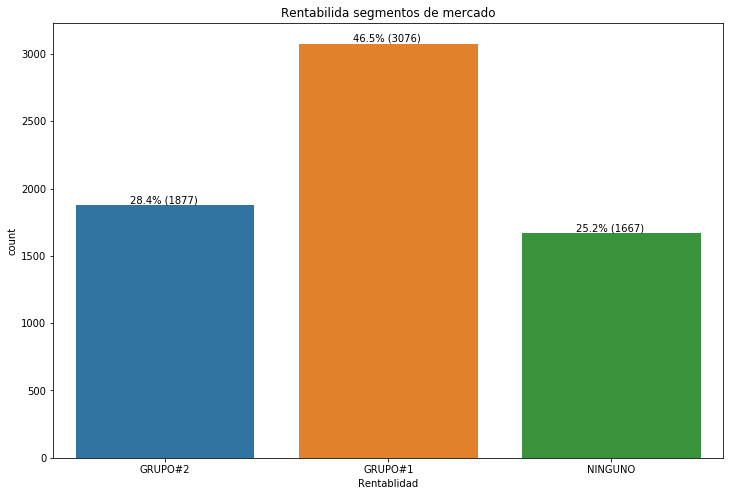

In [9]:
ncount = len(EDA_DATA)

plt.figure(figsize=(12,8))
ax = sns.countplot(x="CLASIFICACION1", data=EDA_DATA)
plt.title('Rentabilida segmentos de mercado')
plt.xlabel('Rentablidad')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}% '.format(100.*y/ncount) + '({:}) '.format(p.get_height()), (x.mean(), y), 
            ha='center', va='bottom')

***
> Como podemos observar las campañas comerciales fueron mas rentables con el GRUPO#1 con un 46.5%
> El 25.2% de las campañas resultaron ser no rentables en ningun grupo, que es casi el mismo 
> porcentaje donde el segundo grupo resulta ser rentable
***

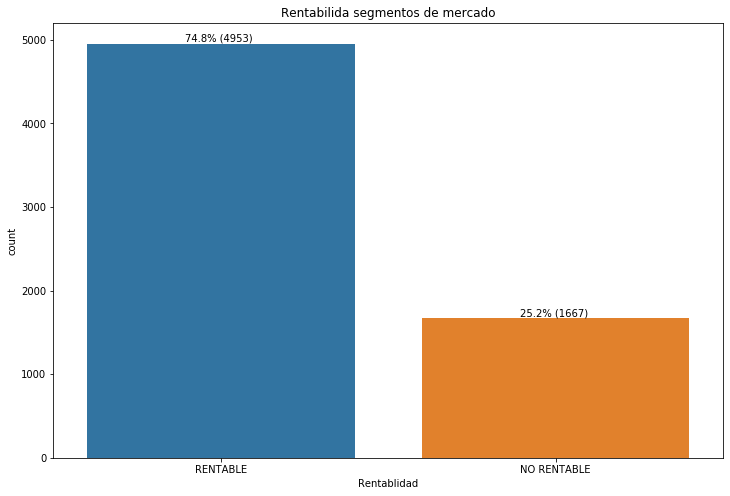

In [10]:
ncount = len(EDA_DATA)

plt.figure(figsize=(12,8))
ax = sns.countplot(x="CLASIFICACION2", data=EDA_DATA)
plt.title('Rentabilida segmentos de mercado')
plt.xlabel('Rentablidad')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}% '.format(100.*y/ncount) + '({:}) '.format(p.get_height()), (x.mean(), y), 
            ha='center', va='bottom')

***
> Podemos identificar tambien que el 74.8% de las campañas comerciales resultaron ser rentables
***

# Observaciones y concluciones [EDA]

***
> Se recomienda definir un nombre mas significativo a las variables que caracterizan a los grupos
> para poder inferir resultados por medio de observacion mas facilmente.
***

# Limpiando y procesando datos

***
> Los datos actuales cuentan con un total de 70 caraceristicas y una variable objetivo
> las primeras 21 carcteristicas pertenecen a l GRUPO#1 y las siguientes 21 al GRUPO#2.
> Las ultimas 29 caracteristicas representan una compracion entre los 2 grupos, por lo
> tanto este analisis se va a enfocar en los grupos y sus caracteristicas unicas contra
> la variable objetivo.
***

### Limpiamdo datos

***
> Separamos las caracteristicas de cada grupo
***

In [11]:
PARA_GRAFICOS = pd.DataFrame()
PARA_GRAFICOS =  dataFrame.copy()

In [12]:
GRUPO1 = PARA_GRAFICOS.iloc[:, 0:21]
GRUPO2 = PARA_GRAFICOS.iloc[:, 21:42]
TARGET = PARA_GRAFICOS.iloc[:, -1]

In [13]:
GRUPO2['GRUPO'] = '2'
GRUPO1['GRUPO'] = '1'

***
> ecodificamos el target
***

In [14]:
GRUPO1['TARGET'] = TARGET
GRUPO1['TARGET'] = np.where(GRUPO1['TARGET'] == 1, 1, 0)

GRUPO2['TARGET'] = TARGET
GRUPO2['TARGET']  = np.where(GRUPO2['TARGET'] == 2, 1, 0)


***
> Recodificamos los nombres de las variables para unificar
***

In [15]:
for CTR in (GRUPO1.filter(regex='^g1_\d+')) :
    GRUPO1.rename(columns={CTR: "FEATURE" + str(GRUPO1.columns.get_loc(CTR) + 1) },  inplace=True)

In [16]:
GRUPO1['ID'] = np.arange(len(GRUPO1)) + 1 
for ID in (GRUPO1['ID']) :
    GRUPO1.loc[ID - 1 , 'CAMPAÑA'] = str(ID)

In [17]:
for CTR in (GRUPO2.filter(regex='^g2_\d+')) :
    GRUPO2.rename(columns={CTR: "FEATURE" + str(GRUPO2.columns.get_loc(CTR) + 1) },  inplace=True)

In [18]:
GRUPO2['ID'] = np.arange(len(GRUPO2)) + 1 
for ID in (GRUPO2['ID']) :
    GRUPO2.loc[ID - 1, 'CAMPAÑA'] = str(ID)

In [19]:
GRUPO1.head()

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,FEATURE11,FEATURE12,FEATURE13,FEATURE14,FEATURE15,FEATURE16,FEATURE17,FEATURE18,FEATURE19,FEATURE20,FEATURE21,GRUPO,TARGET,ID,CAMPAÑA
0,4.50,1,3,4,5,1,1,4,6,0,-2,-2,2.51,2.55,6.24,3.61,0.74,1.22,3.08e-03,3.03e-03,0.58,1,0,1,1
1,2.20,24,22,46,10,24,28,18,22,-4,-4,-8,3.72,3.88,7.42,5.05,0.84,1.98,7.85e-01,1.94e-02,0.68,1,1,2,2
2,12.00,7,4,11,18,8,11,2,10,-3,-8,-11,2.24,2.46,11.09,5.85,0.73,2.02,4.39e-02,1.43e-02,0.53,1,0,3,3
3,1.91,8,5,13,14,6,7,6,9,-1,-3,-4,2.58,2.68,9.86,2.58,0.66,1.41,4.16e-02,2.14e-02,0.26,1,0,4,4
4,2.50,23,16,39,14,33,25,18,27,8,-9,-1,3.47,3.06,11.67,4.55,1.90,1.24,9.41e-01,6.22e-05,0.39,1,0,5,5


In [20]:
GRUPO2.head()

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,FEATURE11,FEATURE12,FEATURE13,FEATURE14,FEATURE15,FEATURE16,FEATURE17,FEATURE18,FEATURE19,FEATURE20,FEATURE21,GRUPO,TARGET,ID,CAMPAÑA
0,1.83,6,0,6,7,4,0,0,1,4,-1,3,2.89,2.62,5.55,0.73,0.16,2.99e-03,2.95e-03,0.59,3.50,2,1,1,1
1,2.80,34,14,48,10,25,16,16,24,9,-8,1,4.07,4.04,6.37,1.51,1.78,7.85e-01,3.34e-02,0.50,3.25,2,0,2,2
2,1.30,11,18,29,2,13,3,16,1,10,15,25,4.92,4.05,10.03,2.49,0.20,2.22e-02,4.20e-02,0.57,5.00,2,1,3,3
3,4.50,5,3,8,17,5,9,7,16,-4,-9,-13,1.96,2.28,3.37,0.67,2.16,4.39e-02,1.04e-02,0.27,3.60,2,0,4,4
4,3.00,29,23,52,8,31,22,21,23,9,-2,7,4.53,4.22,4.49,1.42,1.14,3.65e-01,8.15e-03,0.35,3.40,2,1,5,5


***
> Genramos un único dataFrame con los datos recodificados y listos para trabajar
***

In [21]:
DATOS_LIMPIOS = pd.DataFrame()
DATOS_LIMPIOS = GRUPO1

In [22]:
DATOS_LIMPIOS = DATOS_LIMPIOS.append(GRUPO2, ignore_index = True) 

In [23]:
DATOS_LIMPIOS.head()

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,FEATURE11,FEATURE12,FEATURE13,FEATURE14,FEATURE15,FEATURE16,FEATURE17,FEATURE18,FEATURE19,FEATURE20,FEATURE21,GRUPO,TARGET,ID,CAMPAÑA
0,4.50,1,3,4,5,1,1,4,6,0,-2,-2,2.51,2.55,6.24,3.61,0.74,1.22,3.08e-03,3.03e-03,0.58,1,0,1,1
1,2.20,24,22,46,10,24,28,18,22,-4,-4,-8,3.72,3.88,7.42,5.05,0.84,1.98,7.85e-01,1.94e-02,0.68,1,1,2,2
2,12.00,7,4,11,18,8,11,2,10,-3,-8,-11,2.24,2.46,11.09,5.85,0.73,2.02,4.39e-02,1.43e-02,0.53,1,0,3,3
3,1.91,8,5,13,14,6,7,6,9,-1,-3,-4,2.58,2.68,9.86,2.58,0.66,1.41,4.16e-02,2.14e-02,0.26,1,0,4,4
4,2.50,23,16,39,14,33,25,18,27,8,-9,-1,3.47,3.06,11.67,4.55,1.90,1.24,9.41e-01,6.22e-05,0.39,1,0,5,5


***
> Mostramos la nueva definicion de columnas y
> Mostramos la información del tipo de dato
***

In [24]:
DATOS_LIMPIOS.columns

Index(['FEATURE1', 'FEATURE2', 'FEATURE3', 'FEATURE4', 'FEATURE5', 'FEATURE6', 'FEATURE7',
       'FEATURE8', 'FEATURE9', 'FEATURE10', 'FEATURE11', 'FEATURE12', 'FEATURE13', 'FEATURE14',
       'FEATURE15', 'FEATURE16', 'FEATURE17', 'FEATURE18', 'FEATURE19', 'FEATURE20', 'FEATURE21',
       'GRUPO', 'TARGET', 'ID', 'CAMPAÑA'],
      dtype='object')

In [25]:
DATOS_LIMPIOS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13240 entries, 0 to 13239
Data columns (total 25 columns):
FEATURE1     13240 non-null float64
FEATURE2     13240 non-null int64
FEATURE3     13240 non-null int64
FEATURE4     13240 non-null int64
FEATURE5     13240 non-null int64
FEATURE6     13240 non-null int64
FEATURE7     13240 non-null int64
FEATURE8     13240 non-null int64
FEATURE9     13240 non-null int64
FEATURE10    13240 non-null int64
FEATURE11    13240 non-null int64
FEATURE12    13240 non-null int64
FEATURE13    13240 non-null float64
FEATURE14    13240 non-null float64
FEATURE15    13240 non-null float64
FEATURE16    13240 non-null float64
FEATURE17    13240 non-null float64
FEATURE18    13240 non-null float64
FEATURE19    13240 non-null float64
FEATURE20    13240 non-null float64
FEATURE21    13240 non-null float64
GRUPO        13240 non-null object
TARGET       13240 non-null int32
ID           13240 non-null int32
CAMPAÑA      13240 non-null object
dtypes: float64(10)

In [26]:
DATOS_LIMPIOS.head()

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,FEATURE11,FEATURE12,FEATURE13,FEATURE14,FEATURE15,FEATURE16,FEATURE17,FEATURE18,FEATURE19,FEATURE20,FEATURE21,GRUPO,TARGET,ID,CAMPAÑA
0,4.50,1,3,4,5,1,1,4,6,0,-2,-2,2.51,2.55,6.24,3.61,0.74,1.22,3.08e-03,3.03e-03,0.58,1,0,1,1
1,2.20,24,22,46,10,24,28,18,22,-4,-4,-8,3.72,3.88,7.42,5.05,0.84,1.98,7.85e-01,1.94e-02,0.68,1,1,2,2
2,12.00,7,4,11,18,8,11,2,10,-3,-8,-11,2.24,2.46,11.09,5.85,0.73,2.02,4.39e-02,1.43e-02,0.53,1,0,3,3
3,1.91,8,5,13,14,6,7,6,9,-1,-3,-4,2.58,2.68,9.86,2.58,0.66,1.41,4.16e-02,2.14e-02,0.26,1,0,4,4
4,2.50,23,16,39,14,33,25,18,27,8,-9,-1,3.47,3.06,11.67,4.55,1.90,1.24,9.41e-01,6.22e-05,0.39,1,0,5,5


***
> Acomodamos el orden de las columnas y ordenamos los indices
> para una mejor visualizacion
***

In [27]:
DATOS_LIMPIOS = DATOS_LIMPIOS.sort_values(by=['ID'])

In [28]:
DATOS_LIMPIOS = DATOS_LIMPIOS.reset_index()

In [29]:
DATOS_LIMPIOS.head()

,index,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,FEATURE11,FEATURE12,FEATURE13,FEATURE14,FEATURE15,FEATURE16,FEATURE17,FEATURE18,FEATURE19,FEATURE20,FEATURE21,GRUPO,TARGET,ID,CAMPAÑA
0,0,4.50,1,3,4,5,1,1,4,6,0,-2,-2,2.51,2.55,6.24,3.61,0.74,1.22e+00,3.08e-03,3.03e-03,0.58,1,0,1,1
1,6620,1.83,6,0,6,7,4,0,0,1,4,-1,3,2.89,2.62,5.55,0.73,0.16,2.99e-03,2.95e-03,5.86e-01,3.50,2,1,1,1
2,1,2.20,24,22,46,10,24,28,18,22,-4,-4,-8,3.72,3.88,7.42,5.05,0.84,1.98e+00,7.85e-01,1.94e-02,0.68,1,1,2,2
3,6621,2.80,34,14,48,10,25,16,16,24,9,-8,1,4.07,4.04,6.37,1.51,1.78,7.85e-01,3.34e-02,4.99e-01,3.25,2,0,2,2
4,2,12.00,7,4,11,18,8,11,2,10,-3,-8,-11,2.24,2.46,11.09,5.85,0.73,2.02e+00,4.39e-02,1.43e-02,0.53,1,0,3,3


In [30]:
del DATOS_LIMPIOS['index']
del DATOS_LIMPIOS['ID']

In [31]:
col = "CAMPAÑA" 
DATOS_LIMPIOS = pd.concat([DATOS_LIMPIOS[col],DATOS_LIMPIOS.drop(col,axis=1)], axis=1)
col = "GRUPO" 
DATOS_LIMPIOS = pd.concat([DATOS_LIMPIOS[col],DATOS_LIMPIOS.drop(col,axis=1)], axis=1)

In [32]:
DATOS_LIMPIOS.head()

,GRUPO,CAMPAÑA,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,FEATURE11,FEATURE12,FEATURE13,FEATURE14,FEATURE15,FEATURE16,FEATURE17,FEATURE18,FEATURE19,FEATURE20,FEATURE21,TARGET
0,1,1,4.50,1,3,4,5,1,1,4,6,0,-2,-2,2.51,2.55,6.24,3.61,0.74,1.22e+00,3.08e-03,3.03e-03,0.58,0
1,2,1,1.83,6,0,6,7,4,0,0,1,4,-1,3,2.89,2.62,5.55,0.73,0.16,2.99e-03,2.95e-03,5.86e-01,3.50,1
2,1,2,2.20,24,22,46,10,24,28,18,22,-4,-4,-8,3.72,3.88,7.42,5.05,0.84,1.98e+00,7.85e-01,1.94e-02,0.68,1
3,2,2,2.80,34,14,48,10,25,16,16,24,9,-8,1,4.07,4.04,6.37,1.51,1.78,7.85e-01,3.34e-02,4.99e-01,3.25,0
4,1,3,12.00,7,4,11,18,8,11,2,10,-3,-8,-11,2.24,2.46,11.09,5.85,0.73,2.02e+00,4.39e-02,1.43e-02,0.53,0


***
> Como parte de la limpieza, estandarizamos los datos
> aplicando una normalizacion en los datos de cada caracteristica
***

In [33]:
ordinalEncoder = OrdinalEncoder()

for dato in (DATOS_LIMPIOS.filter(regex='^FEATURE\d+')) :
    DATOS_LIMPIOS[dato]= ordinalEncoder.fit_transform(DATOS_LIMPIOS[dato].values.reshape(-1, 1))

In [34]:
DATOS_LIMPIOS.head()

,GRUPO,CAMPAÑA,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,FEATURE11,FEATURE12,FEATURE13,FEATURE14,FEATURE15,FEATURE16,FEATURE17,FEATURE18,FEATURE19,FEATURE20,FEATURE21,TARGET
0,1,1,125.0,1.0,3.0,4.0,4.0,1.0,1.0,4.0,6.0,27.0,35.0,54.0,2752.0,3443.0,4531.0,6863.0,1630.0,3748.0,467.0,393.0,5268.0,0
1,2,1,58.0,6.0,0.0,6.0,6.0,4.0,0.0,0.0,1.0,31.0,36.0,59.0,5094.0,4099.0,3677.0,757.0,12.0,84.0,459.0,6022.0,6300.0,1
2,1,2,73.0,24.0,22.0,46.0,9.0,24.0,28.0,18.0,22.0,23.0,33.0,48.0,8117.0,9205.0,5697.0,8715.0,2301.0,6243.0,1551.0,509.0,6243.0,1
3,2,2,95.0,34.0,14.0,48.0,9.0,25.0,16.0,16.0,24.0,36.0,29.0,57.0,8917.0,9504.0,4656.0,4047.0,9534.0,1851.0,869.0,3973.0,6295.0,0
4,1,3,147.0,7.0,4.0,11.0,17.0,8.0,11.0,2.0,10.0,24.0,29.0,45.0,1416.0,2409.0,9059.0,9674.0,1519.0,6300.0,925.0,488.0,3973.0,0


### Punto de control - [ Separando datos de control ]

In [35]:
DATOS_LIMPIOS["CLASIFICACION2"] = DATOS_LIMPIOS['TARGET'].map({0:'NO RENTABLE', 1:'RENTABLE', 2:'RENTABLE'})

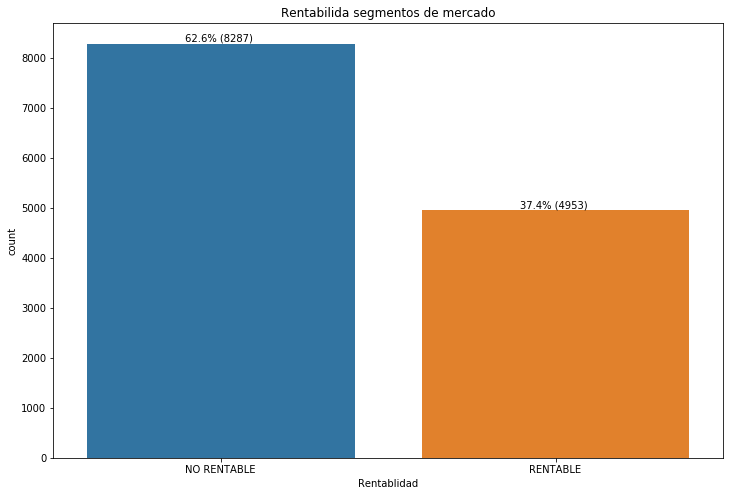

In [36]:
ncount = len(DATOS_LIMPIOS)

plt.figure(figsize=(12,8))
ax = sns.countplot(x="CLASIFICACION2", data=DATOS_LIMPIOS)
plt.title('Rentabilida segmentos de mercado')
plt.xlabel('Rentablidad')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}% '.format(100.*y/ncount) + '({:}) '.format(p.get_height()), (x.mean(), y), 
            ha='center', va='bottom')

***
> Separamos los datos originales para aplicar el modelo final
***

In [37]:
del DATOS_LIMPIOS['CLASIFICACION2']
ORIGINALES = pd.DataFrame()
ORIGINALES = DATOS_LIMPIOS.copy()


***
> Separamos los datos que vamos a utilizar para el entrenamiento de los modelos
***

In [38]:
ENTRENAMIENTO = pd.DataFrame()
ENTRENAMIENTO = DATOS_LIMPIOS.copy() 

***
> Creamos dataFrame para almacenar los resultados de las pruebas
> con los algoritmos y visualizar los resultados
***

In [39]:
RENDIMIENTO_NORMAL = pd.DataFrame()
RENDIMIENTO_CALIBRADO = pd.DataFrame()

***

# Selección de caracteristicas mas importantes
## Aplicamos [ RFE ]

***

> Seperamos las caracteristicas con datos y 
> la variable dependiente u objetivo

***

In [40]:
X = ENTRENAMIENTO.iloc[:, 0:23]
y = ENTRENAMIENTO.iloc[:, -1]

In [41]:
model = LinearRegression()
rfe_SD = RFE(model, 23)
X_rfe_SD = rfe_SD.fit_transform(X,y)  
model.fit(X_rfe_SD,y)
print(rfe_SD.support_)
print(rfe_SD.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


***
> Aplicando RFE con 23 propiedades
> y visualizamos el resultado de variables obtimas
***

In [42]:
nof_list=np.arange(1, 23)            
high_score_SD=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe_SD = RFE(model, nof_list[n])
    X_train_rfe_SD = rfe_SD.fit_transform(X_train, y_train)
    X_test_rfe_SD = rfe_SD.transform(X_test)
    model.fit(X_train_rfe_SD, y_train)
    score = model.score(X_test_rfe_SD, y_test)
    score_list.append(score)
    if(score > high_score_SD):
        high_score_SD = score
        nof = nof_list[n]

print("Número obtimo de columnas o caracteristicas : %d" %nof)
print("Puntuación con %d columnas: %f" % (nof, high_score_SD))

Número obtimo de columnas o caracteristicas : 18
Puntuación con 18 columnas: 0.181579


***
> Mostramos la lista de columnas que el proceso RFE
> ha elegido como las mas obtimas
***

In [43]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe_SD = RFE(model, 18)             
#Transforming data using RFE
X_rfe_SD = rfe_SD.fit_transform(X, y)  
#Fitting the data to model
model.fit(X_rfe_SD, y)              
temp = pd.Series(rfe_SD.support_, index = cols)
selected_features_rfe_SD = temp[temp==True].index
print(selected_features_rfe_SD)

Index(['GRUPO', 'FEATURE1', 'FEATURE2', 'FEATURE3', 'FEATURE4', 'FEATURE5', 'FEATURE6', 'FEATURE7',
       'FEATURE8', 'FEATURE9', 'FEATURE10', 'FEATURE11', 'FEATURE12', 'FEATURE13', 'FEATURE14',
       'FEATURE15', 'FEATURE19', 'FEATURE20'],
      dtype='object')


***
> Creamos un nuevo dataFrame conlas columnas elegidas por el metodo RFE
> y seguidamente se le adjunta la columna ['CAMPAÑA'] que fue eliminada pero
> es importante por la naturaleza de los datos
***

In [44]:
df = ENTRENAMIENTO.filter(selected_features_rfe_SD, axis=1)
df = pd.concat([df, y], axis=1)

In [45]:
df['CAMPAÑA'] = ENTRENAMIENTO['CAMPAÑA']
df = pd.concat([df['CAMPAÑA'], df.drop('CAMPAÑA', axis=1)], axis=1)


In [46]:
df.head()

,CAMPAÑA,GRUPO,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,FEATURE11,FEATURE12,FEATURE13,FEATURE14,FEATURE15,FEATURE19,FEATURE20,TARGET
0,1,1,125.0,1.0,3.0,4.0,4.0,1.0,1.0,4.0,6.0,27.0,35.0,54.0,2752.0,3443.0,4531.0,467.0,393.0,0
1,1,2,58.0,6.0,0.0,6.0,6.0,4.0,0.0,0.0,1.0,31.0,36.0,59.0,5094.0,4099.0,3677.0,459.0,6022.0,1
2,2,1,73.0,24.0,22.0,46.0,9.0,24.0,28.0,18.0,22.0,23.0,33.0,48.0,8117.0,9205.0,5697.0,1551.0,509.0,1
3,2,2,95.0,34.0,14.0,48.0,9.0,25.0,16.0,16.0,24.0,36.0,29.0,57.0,8917.0,9504.0,4656.0,869.0,3973.0,0
4,3,1,147.0,7.0,4.0,11.0,17.0,8.0,11.0,2.0,10.0,24.0,29.0,45.0,1416.0,2409.0,9059.0,925.0,488.0,0


***
> Sepramos la variable objetivo o dependiente
> y los valores de las propiedades en dataFrames
> para el proceso de entrenamiento
***

In [47]:
target = df.iloc[:, -1]
propiedades = df.iloc[: ,0:19]
propiedades.head()

,CAMPAÑA,GRUPO,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,FEATURE11,FEATURE12,FEATURE13,FEATURE14,FEATURE15,FEATURE19,FEATURE20
0,1,1,125.0,1.0,3.0,4.0,4.0,1.0,1.0,4.0,6.0,27.0,35.0,54.0,2752.0,3443.0,4531.0,467.0,393.0
1,1,2,58.0,6.0,0.0,6.0,6.0,4.0,0.0,0.0,1.0,31.0,36.0,59.0,5094.0,4099.0,3677.0,459.0,6022.0
2,2,1,73.0,24.0,22.0,46.0,9.0,24.0,28.0,18.0,22.0,23.0,33.0,48.0,8117.0,9205.0,5697.0,1551.0,509.0
3,2,2,95.0,34.0,14.0,48.0,9.0,25.0,16.0,16.0,24.0,36.0,29.0,57.0,8917.0,9504.0,4656.0,869.0,3973.0
4,3,1,147.0,7.0,4.0,11.0,17.0,8.0,11.0,2.0,10.0,24.0,29.0,45.0,1416.0,2409.0,9059.0,925.0,488.0


In [48]:
propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13240 entries, 0 to 13239
Data columns (total 19 columns):
CAMPAÑA      13240 non-null object
GRUPO        13240 non-null object
FEATURE1     13240 non-null float64
FEATURE2     13240 non-null float64
FEATURE3     13240 non-null float64
FEATURE4     13240 non-null float64
FEATURE5     13240 non-null float64
FEATURE6     13240 non-null float64
FEATURE7     13240 non-null float64
FEATURE8     13240 non-null float64
FEATURE9     13240 non-null float64
FEATURE10    13240 non-null float64
FEATURE11    13240 non-null float64
FEATURE12    13240 non-null float64
FEATURE13    13240 non-null float64
FEATURE14    13240 non-null float64
FEATURE15    13240 non-null float64
FEATURE19    13240 non-null float64
FEATURE20    13240 non-null float64
dtypes: float64(17), object(2)
memory usage: 1.9+ MB


# Entrenamiento y calibracion de modelos

***
> De las propiedades totales sacamos el 75% (9930) para entrenamiento
***

In [49]:
X_train = (propiedades[: 9930])
print('Número de observaciones en nuestro frame de propiedades de  entrenamiento (x):', len(X_train.index))
print('----------------------------------------------------------------------------------------------------')
print(X_train.head())
#print(X_train.tail())
print('----------------------------------------------------------------------------------------------------')
#Sacamos el 75% (9930) De los los datos totales de nuestro target o variable dependiente para entrenamiento
y_train = target[: 9930]
print('Número de observaciones en nuestro frame objetivo (y): ', len(X_train.index))
print('----------------------------------------------------------------------------------------------------')
print(y_train.head())
print('----------------------------------------------------------------------------------------------------')


Número de observaciones en nuestro frame de propiedades de  entrenamiento (x): 9930
----------------------------------------------------------------------------------------------------
  CAMPAÑA GRUPO  FEATURE1  FEATURE2  FEATURE3  FEATURE4  FEATURE5  FEATURE6  FEATURE7  FEATURE8  \
0       1     1     125.0       1.0       3.0       4.0       4.0       1.0       1.0       4.0   
1       1     2      58.0       6.0       0.0       6.0       6.0       4.0       0.0       0.0   
2       2     1      73.0      24.0      22.0      46.0       9.0      24.0      28.0      18.0   
3       2     2      95.0      34.0      14.0      48.0       9.0      25.0      16.0      16.0   
4       3     1     147.0       7.0       4.0      11.0      17.0       8.0      11.0       2.0   

   FEATURE9  FEATURE10  FEATURE11  FEATURE12  FEATURE13  FEATURE14  FEATURE15  FEATURE19  \
0       6.0       27.0       35.0       54.0     2752.0     3443.0     4531.0      467.0   
1       1.0       31.0       36.0   

***
> De las propiedades totales sacamos el 25% (3310) para testeo
***

In [50]:
X_test = (propiedades[-3310:])
print('Número de observaciones en nuestro frame de propiedades de  entrenamiento (x):', len(X_test.index))
print('----------------------------------------------------------------------------------------------------')
print(X_test.head())
print('----------------------------------------------------------------------------------------------------')
#Sacamos el 25% (3310) De los los datos totales de nuestro target o variable dependiente para testeo
y_test = target[-3310:]
print('Número de observaciones en nuestro frame objetivo (y): ', len(y_test.index))
print('----------------------------------------------------------------------------------------------------')
print(y_test.head())
print('----------------------------------------------------------------------------------------------------')

Número de observaciones en nuestro frame de propiedades de  entrenamiento (x): 3310
----------------------------------------------------------------------------------------------------
     CAMPAÑA GRUPO  FEATURE1  FEATURE2  FEATURE3  FEATURE4  FEATURE5  FEATURE6  FEATURE7  \
9930    4966     2      37.0      29.0      26.0      55.0       1.0      27.0      12.0   
9931    4966     1     139.0      10.0       6.0      16.0      19.0      11.0      23.0   
9932    4967     2      28.0      12.0       8.0      20.0       1.0      14.0       0.0   
9933    4967     1     146.0       5.0       4.0       9.0       9.0       2.0       5.0   
9934    4968     2      79.0      11.0      10.0      21.0       1.0      10.0       4.0   

      FEATURE8  FEATURE9  FEATURE10  FEATURE11  FEATURE12  FEATURE13  FEATURE14  FEATURE15  \
9930      24.0      12.0       42.0       49.0       83.0    10323.0    10603.0     5952.0   
9931      11.0      32.0       15.0       16.0       23.0       85.0      

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify = y_train)
X_train.shape, X_test.shape

((7447, 19), (2483, 19))

# Random Forest (RF)

In [52]:
from sklearn.ensemble import RandomForestClassifier
RF_high_score = 0
RF_param = 1

for K in range(50):
    RF_clasificador = RandomForestClassifier(max_depth= K+1)
    RF_clasificador.fit(X_train, y_train)
    RF_pred = RF_clasificador.predict(X_test)
    score = accuracy_score(y_test, RF_pred)
    if( score > RF_high_score):
        RF_high_score = score
        RF_param = K + 1

print('Maxima precision de :', RF_high_score, 'con un RF_param  en ', RF_param)

Maxima precision de : 0.7031816351188079 con un RF_param  en  8


In [53]:
print('Clasificando con RF_param en :', RF_param)
RF_clasificador = RandomForestClassifier(max_depth = RF_param)
RF_clasificador.fit(X_train, y_train)
RF_pred = RF_clasificador.predict(X_test)
print('Exactitud lograda:', accuracy_score(y_test, RF_pred))

Clasificando con RF_param en : 8
Exactitud lograda: 0.6999597261377366


In [54]:
RF_pred_prob = RF_clasificador.predict_proba(X_test)[:, 1]
metrics.roc_auc_score(y_test, RF_pred_prob)

0.7279297978008349

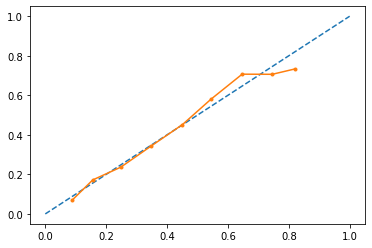

In [55]:
# Modelo sin calibrar
fop, mpv = calibration_curve(y_test, RF_pred_prob, n_bins=10)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(mpv, fop, marker='.')
plt.show()

Matriz de confusion
[[0.86533505 0.13466495]
 [0.57572503 0.42427497]]


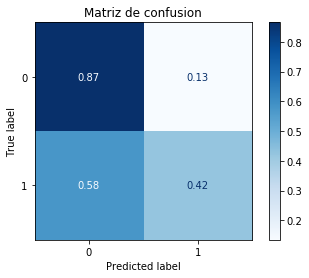

In [56]:
#confusion matrix
disp = plot_confusion_matrix(RF_clasificador, X_test, y_test, display_labels=target.unique(), cmap=plt.cm.Blues, normalize= 'true')
disp.ax_.set_title('Matriz de confusion')
print('Matriz de confusion')
print(disp.confusion_matrix)
plt.show()

In [57]:
CM = pd.DataFrame({"Algoritmo": ['RF', 'RF'],
                   "Tipo": ["Rentable", "No-Rentable"],
                   "Precision":[disp.confusion_matrix[1][1], disp.confusion_matrix[0][0]]})
RENDIMIENTO_NORMAL = RENDIMIENTO_NORMAL.append(CM) 

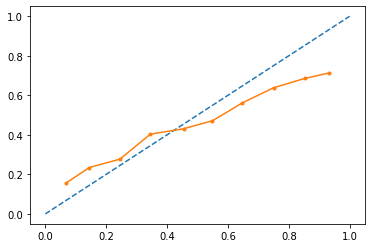

In [58]:
from sklearn.calibration import CalibratedClassifierCV
#Random Forest calibrado
RF_calibrado = CalibratedClassifierCV(RF_clasificador, cv='prefit')
RF_calibrado.fit(X_train, y_train)
# Prediciendo probabilidades
RF_pred_probs_calibrado = RF_calibrado.predict_proba(X_test)[:, 1]

fop, mpv = calibration_curve(y_test, RF_pred_probs_calibrado, n_bins=10)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(mpv, fop, marker='.')
plt.show()

Matriz de confusion
[[0.8060567  0.1939433 ]
 [0.48657358 0.51342642]]


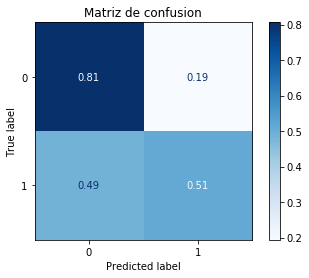

In [59]:
#confusion matrix
disp = plot_confusion_matrix(RF_calibrado, X_test, y_test, display_labels=target.unique(), cmap=plt.cm.Blues, normalize= 'true')
disp.ax_.set_title('Matriz de confusion')
print('Matriz de confusion')
print(disp.confusion_matrix)
plt.show()

In [60]:
CM = pd.DataFrame({"Algoritmo": ['RF', 'RF'],
                   "Tipo": ["Rentable", "No-Rentable"],
                   "Precision":[disp.confusion_matrix[1][1], disp.confusion_matrix[0][0]]})
RENDIMIENTO_CALIBRADO = RENDIMIENTO_CALIBRADO.append(CM) 

# K-nearest neighbors (KNN)

In [61]:
from sklearn.neighbors import KNeighborsClassifier
KNN_high_score = 0
KNN_param = 1
for K in range(100):
    KNN_clasificador = KNeighborsClassifier(n_neighbors=K+1)
    KNN_clasificador.fit(X_train, y_train)
    KNN_pred = KNN_clasificador.predict(X_test)
    score = accuracy_score(y_test, KNN_pred)
    if( score > KNN_high_score):
        KNN_high_score = score
        KNN_param = K+1
        
print('Maxima precision de :', KNN_high_score, 'con un KNN_param  en ', KNN_param)

Maxima precision de : 0.6697543294401933 con un KNN_param  en  52


In [62]:
print('Clasificando con KNN_param en :', KNN_param)
KNN_clasificador = KNeighborsClassifier(n_neighbors = KNN_param)
KNN_clasificador.fit(X_train, y_train)
KNN_pred = KNN_clasificador.predict(X_test)
print('Exactitud lograda:', accuracy_score(y_test, KNN_pred))

Clasificando con KNN_param en : 52
Exactitud lograda: 0.6697543294401933


In [63]:
KNN_pred_prob = KNN_clasificador.predict_proba(X_test)[:, 1]
metrics.roc_auc_score(y_test, KNN_pred_prob)

0.6645671155059962

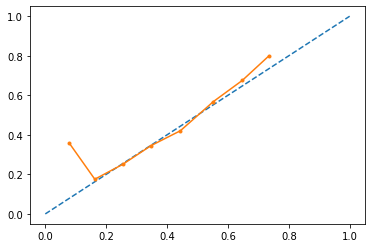

In [64]:
# Modelo sin calibrar
fop, mpv = calibration_curve(y_test, KNN_pred_prob, n_bins=10)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(mpv, fop, marker='.')
plt.show()

Matriz de confusion
[[0.89819588 0.10180412]
 [0.71106337 0.28893663]]


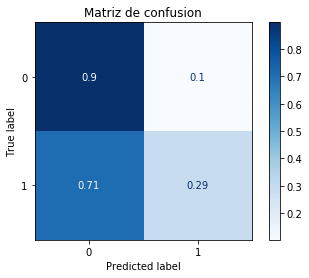

In [65]:
# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(KNN_clasificador, X_test, y_test, display_labels=target.unique(), cmap=plt.cm.Blues, normalize= 'true')
disp.ax_.set_title('Matriz de confusion')
print('Matriz de confusion')
print(disp.confusion_matrix)
plt.show()

In [66]:
CM = pd.DataFrame({"Algoritmo": ['KNN', 'KNN'],
                   "Tipo": ["Rentable", "No-Rentable"],
                   "Precision":[disp.confusion_matrix[1][1], disp.confusion_matrix[0][0]]})
RENDIMIENTO_NORMAL = RENDIMIENTO_NORMAL.append(CM) 

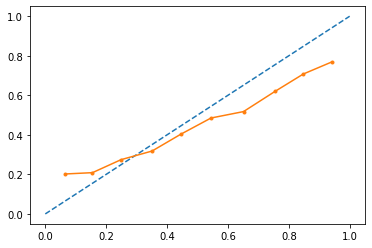

In [67]:
from sklearn.calibration import CalibratedClassifierCV
# KNN calibrado
KNN_calibrado = CalibratedClassifierCV(KNN_clasificador, method='sigmoid', cv=5)
KNN_calibrado.fit(X_train, y_train)

# Prediciendo probabilidades
KNN_pred_probs_calibrado = KNN_calibrado.predict_proba(X_test)[:, 1]
fop, mpv = calibration_curve(y_test, KNN_pred_probs_calibrado, n_bins=10, normalize=True)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(mpv, fop, marker='.')
plt.show()

Matriz de confusion
[[0.90335052 0.09664948]
 [0.73791622 0.26208378]]


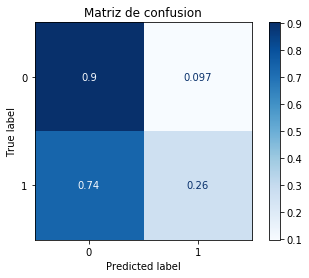

In [68]:
# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(KNN_calibrado, X_test, y_test, display_labels=target.unique(), cmap=plt.cm.Blues, normalize= 'true')
disp.ax_.set_title('Matriz de confusion')
print('Matriz de confusion')
print(disp.confusion_matrix)
plt.show()

In [69]:
CM = pd.DataFrame({"Algoritmo": ['KNN', 'KNN'],
                   "Tipo": ["Rentable", "No-Rentable"],
                   "Precision":[disp.confusion_matrix[1][1], disp.confusion_matrix[0][0]]})
RENDIMIENTO_CALIBRADO = RENDIMIENTO_CALIBRADO.append(CM) 


#  Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
DT_high_score = 0
DT_param = 1
for K in range(50):
    DT_clasificador = DecisionTreeClassifier(criterion = 'gini', max_depth = K+1, max_features = 13, min_samples_leaf = 2, random_state = 0)
    DT_clasificador.fit(X_train, y_train)
    DT_pred = DT_clasificador.predict(X_test)
    score = accuracy_score(y_test, DT_pred)
    if( score > DT_high_score):
        DT_high_score = score
        DT_param = K+1
        
print('Maxima precision de :', DT_high_score, 'con un DT_param  en ', DT_param)

Maxima precision de : 0.7003624647603706 con un DT_param  en  5


In [71]:
print('Clasificando con DT_param en :', DT_param)
DT_clasificador = DecisionTreeClassifier(criterion = 'gini', max_depth = DT_param, max_features = 13,
                                         min_samples_leaf = 2, random_state = 0)
DT_clasificador.fit(X_train, y_train)
DT_pred = DT_clasificador.predict(X_test)
print('Exactitud lograda:', accuracy_score(y_test, DT_pred))

Clasificando con DT_param en : 5
Exactitud lograda: 0.7003624647603706


In [72]:
DT_pred_prob = DT_clasificador.predict_proba(X_test)[:, 1]
metrics.roc_auc_score(y_test, DT_pred_prob)

0.7216404874483705

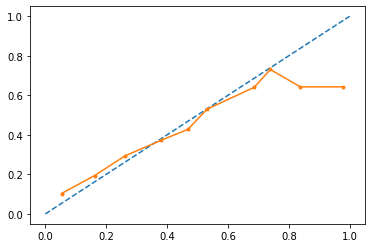

In [73]:
# Modelo sin calibrar
fop, mpv = calibration_curve(y_test, DT_pred_prob, n_bins=10)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(mpv, fop, marker='.')
plt.show()

Matriz de confusion
[[0.86791237 0.13208763]
 [0.57894737 0.42105263]]


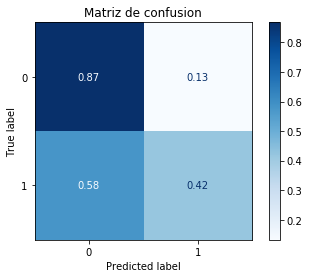

In [74]:
# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(DT_clasificador, X_test, y_test, display_labels=target.unique(),
                             cmap=plt.cm.Blues, normalize= 'true')
disp.ax_.set_title('Matriz de confusion')
print('Matriz de confusion')
print(disp.confusion_matrix)
plt.show()

In [75]:
CM = pd.DataFrame({"Algoritmo": ['Decision Tree', 'Decision Tree'],
                   "Tipo": ["Rentable", "No-Rentable"],
                   "Precision":[disp.confusion_matrix[1][1], disp.confusion_matrix[0][0]]})
RENDIMIENTO_NORMAL = RENDIMIENTO_NORMAL.append(CM) 

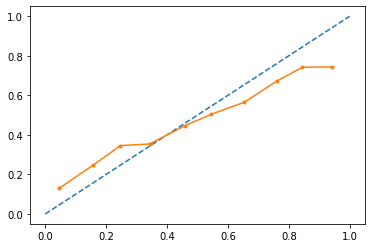

In [76]:
from sklearn.calibration import CalibratedClassifierCV
# Decision Tree calibrado
DT_calibrado = CalibratedClassifierCV(DT_clasificador, method='sigmoid', cv=9)
DT_calibrado.fit(X_train, y_train)

# Prediciendo probabilidades
DT_pred_probs_calibrado = DT_calibrado.predict_proba(X_test)[:, 1]
fop, mpv = calibration_curve(y_test, DT_pred_probs_calibrado, n_bins=10, normalize=True)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(mpv, fop, marker='.')
plt.show()

Matriz de confusion
[[0.85309278 0.14690722]
 [0.55209452 0.44790548]]


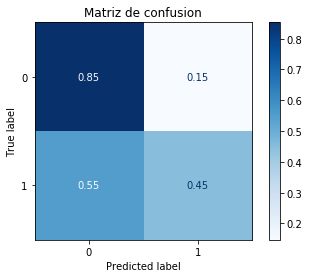

In [77]:
# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(DT_calibrado, X_test, y_test, display_labels=target.unique(), cmap=plt.cm.Blues, normalize= 'true')
disp.ax_.set_title('Matriz de confusion')
print('Matriz de confusion')
print(disp.confusion_matrix)
plt.show()

In [78]:
CM = pd.DataFrame({"Algoritmo": ['Decision Tree', 'Decision Tree'],
                   "Tipo": ["Rentable", "No-Rentable"],
                   "Precision":[disp.confusion_matrix[1][1], disp.confusion_matrix[0][0]]})
RENDIMIENTO_CALIBRADO = RENDIMIENTO_CALIBRADO.append(CM) 

In [79]:
RENDIMIENTO_NORMAL.head(10)

,Algoritmo,Tipo,Precision
0,RF,Rentable,0.42
1,RF,No-Rentable,0.87
0,KNN,Rentable,0.29
1,KNN,No-Rentable,0.90
0,Decision Tree,Rentable,0.42
1,Decision Tree,No-Rentable,0.87


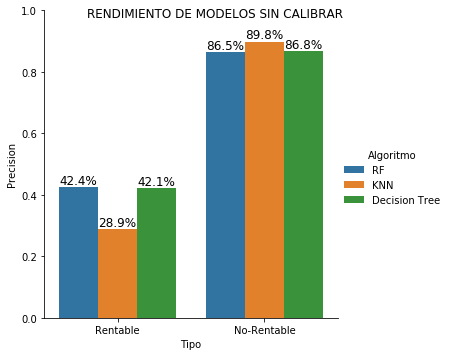

In [80]:

fg = sns.catplot(x="Tipo", y="Precision", hue="Algoritmo", kind="bar", data=RENDIMIENTO_NORMAL);
fg.fig.suptitle('RENDIMIENTO DE MODELOS SIN CALIBRAR')
ax = plt.gca()
y_max = RENDIMIENTO_NORMAL['Precision'].value_counts().max() 
ax.set_ylim([0, 1])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / y_max)
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),percentage, fontsize=12, color='black', ha='center', va='bottom')

In [81]:
RENDIMIENTO_CALIBRADO.head(10)

,Algoritmo,Tipo,Precision
0,RF,Rentable,0.51
1,RF,No-Rentable,0.81
0,KNN,Rentable,0.26
1,KNN,No-Rentable,0.90
0,Decision Tree,Rentable,0.45
1,Decision Tree,No-Rentable,0.85


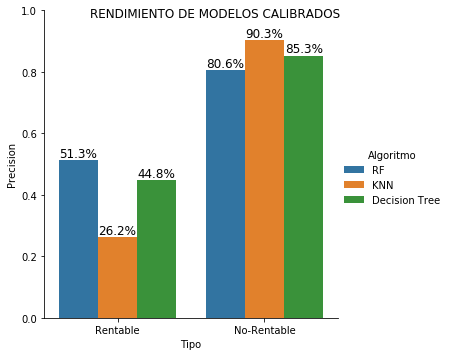

In [82]:
fg = sns.catplot(x="Tipo", y="Precision", hue="Algoritmo", kind="bar", data=RENDIMIENTO_CALIBRADO);
fg.fig.suptitle('RENDIMIENTO DE MODELOS CALIBRADOS')
ax = plt.gca()
ax.set_ylim([0, 1])
y_max = RENDIMIENTO_CALIBRADO['Precision'].value_counts().max() 

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / y_max)
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),percentage, fontsize=12, color='black', ha='center', va='bottom')

# Seleccion del mejor modelo

***
> Como vemos en las graficas de rendimiento de modelos calibrados,
> el mejor rendimiento es obtenido por el modelo Random Forest [ RF ]
> en el momento de predecir la variable dependiente (TIPO)
***

# Aplicando mejor modelo (RandomForest)

In [83]:
DATOS_COMPLETOS = ORIGINALES.filter(selected_features_rfe_SD, axis=1)
#DATOS_COMPLETOS = pd.concat([DATOS_COMPLETOS, y], axis=1)

In [84]:
DATOS_COMPLETOS['CAMPAÑA'] = ORIGINALES['CAMPAÑA']
DATOS_COMPLETOS = pd.concat([df['CAMPAÑA'], df.drop('CAMPAÑA', axis=1)], axis=1)
DATOS_COMPLETOS.head()

,CAMPAÑA,GRUPO,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,FEATURE11,FEATURE12,FEATURE13,FEATURE14,FEATURE15,FEATURE19,FEATURE20,TARGET
0,1,1,125.0,1.0,3.0,4.0,4.0,1.0,1.0,4.0,6.0,27.0,35.0,54.0,2752.0,3443.0,4531.0,467.0,393.0,0
1,1,2,58.0,6.0,0.0,6.0,6.0,4.0,0.0,0.0,1.0,31.0,36.0,59.0,5094.0,4099.0,3677.0,459.0,6022.0,1
2,2,1,73.0,24.0,22.0,46.0,9.0,24.0,28.0,18.0,22.0,23.0,33.0,48.0,8117.0,9205.0,5697.0,1551.0,509.0,1
3,2,2,95.0,34.0,14.0,48.0,9.0,25.0,16.0,16.0,24.0,36.0,29.0,57.0,8917.0,9504.0,4656.0,869.0,3973.0,0
4,3,1,147.0,7.0,4.0,11.0,17.0,8.0,11.0,2.0,10.0,24.0,29.0,45.0,1416.0,2409.0,9059.0,925.0,488.0,0


In [85]:
DATOS_COMPLETOS_X = DATOS_COMPLETOS.iloc[: ,0:19]
DATOS_COMPLETOS_Y = DATOS_COMPLETOS.iloc[:, -1]
DATOS_COMPLETOS_Y

0        0
1        1
2        1
3        0
4        0
        ..
13235    1
13236    0
13237    1
13238    0
13239    0
Name: TARGET, Length: 13240, dtype: int32

In [92]:
PREDICCION_FINAL = RF_clasificador.predict(DATOS_COMPLETOS_X)
print('Exactitud lograda:', accuracy_score(DATOS_COMPLETOS_Y, PREDICCION_FINAL))

Exactitud lograda: 0.7441842900302115


Matriz de confusion
[[0.90056715 0.09943285]
 [0.51746416 0.48253584]]


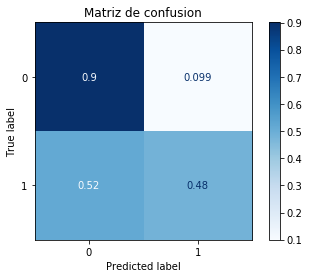

In [93]:
#confusion matrix
disp = plot_confusion_matrix(RF_clasificador, DATOS_COMPLETOS_X, DATOS_COMPLETOS_Y, display_labels=target.unique(), cmap=plt.cm.Blues, normalize= 'true')
disp.ax_.set_title('Matriz de confusion')
print('Matriz de confusion')
print(disp.confusion_matrix)
plt.show()

In [94]:
DATOS_COMPLETOS['PREDICCION'] = PREDICCION_FINAL
DATOS_COMPLETOS["CLASIFICACION1"] = DATOS_COMPLETOS['TARGET'].map({0:'NO RENTABLE', 1:'RENTABLE'})
DATOS_COMPLETOS["CLASIFICACION2"] = DATOS_COMPLETOS['PREDICCION'].map({0:'NO RENTABLE', 1:'RENTABLE'})

# Resultado

> Los resultados de aplicar el mejor modelo a los datos relales notamos que no es lo que andamos buscando,
> El modelo se muestra eficiente en predecir los grupos no rentables con un 90% de exactitud, pero por otro
> lado el predecir grupos rentables es totalmente inutil por lo que la aplicacion de esta solucion queda
> desestimada, ya que ninguno de los otros modelos podría arrojar un mejor resultado

### Comparaciones

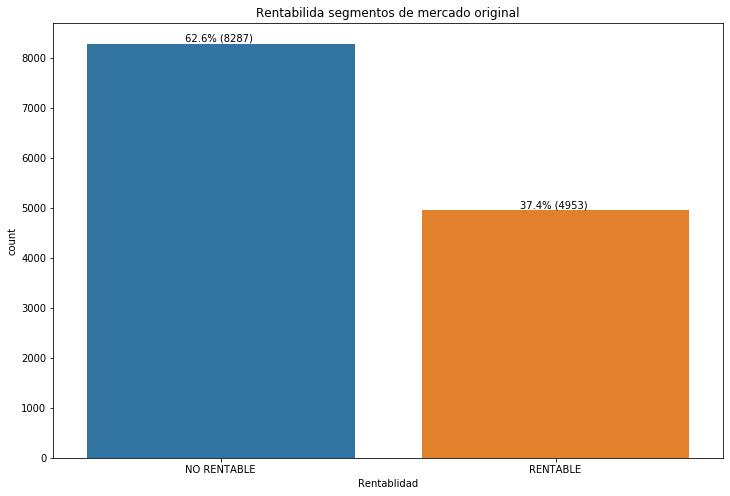

In [95]:
ncount = len(DATOS_LIMPIOS)

plt.figure(figsize=(12,8))
ax = sns.countplot(x="CLASIFICACION1", data=DATOS_COMPLETOS)
plt.title('Rentabilida segmentos de mercado original')
plt.xlabel('Rentablidad')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}% '.format(100.*y/ncount) + '({:}) '.format(p.get_height()), (x.mean(), y), 
            ha='center', va='bottom')

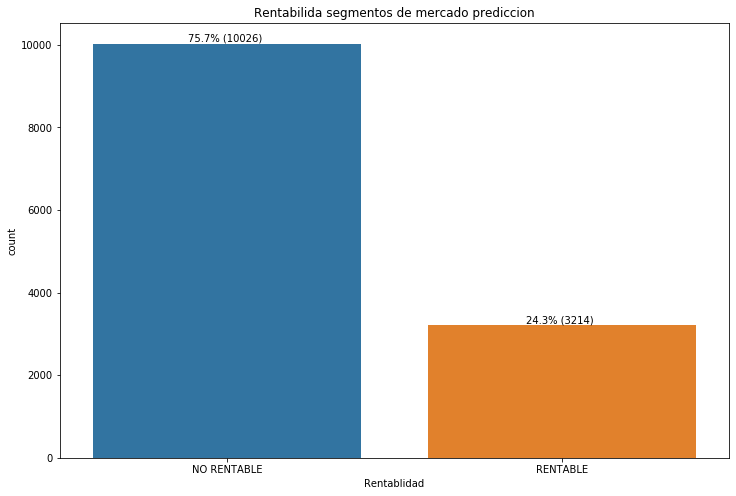

In [96]:
ncount = len(DATOS_COMPLETOS)

plt.figure(figsize=(12,8))
ax = sns.countplot(x="CLASIFICACION2", data=DATOS_COMPLETOS)
plt.title('Rentabilida segmentos de mercado prediccion')
plt.xlabel('Rentablidad')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}% '.format(100.*y/ncount) + '({:}) '.format(p.get_height()), (x.mean(), y), 
            ha='center', va='bottom')

> Como podemos observar existe una diferencia de hasta 10 puntos porcentuales entre
> los datos reales y los predichos por el modelo